In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# mutual_info_classif, mutual_info_regression: Functions for calculating Mutual Information Between classes and the target
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest, SelectPercentile
%matplotlib inline

In [4]:
data = pd.read_csv('data.csv')

In [5]:
X = data.drop(['target','Unnamed: 0'], axis=1)
X.head()

,no_strokes_st,no_strokes_dy,speed_st,speed_dy,magnitude_vel_st,magnitude_horz_vel_st,magnitude_vert_vel_st,magnitude_vel_dy,magnitude_horz_vel_dy,magnitude_vert_vel_dy,...,magnitude_jerk_dy,magnitude_horz_jerk_dy,magnitude_vert_jerk_dy,ncv_st,ncv_dy,nca_st,nca_dy,in_air_stcp,on_surface_st,on_surface_dy
0,12.0,2.0,0.000293,0.000431,0.061342,0.038319,0.039050,0.084891,0.053885,0.052829,...,0.000010,0.000006,0.000006,185.250000,412.857143,61.833333,470.000000,0.0,3678.0,4852.0
1,4.0,6.0,0.000286,0.000281,0.119159,0.077012,0.074216,0.160497,0.101360,0.099211,...,0.000015,0.000010,0.000009,192.777778,173.875000,102.500000,54.000000,0.0,1688.0,1587.0
2,4.0,4.0,0.000278,0.000277,0.113889,0.071547,0.073336,0.191965,0.117724,0.127062,...,0.000051,0.000023,0.000042,263.571429,136.333333,120.500000,25.200000,0.0,2246.0,1332.0
3,4.0,4.0,0.000286,0.000275,0.154621,0.101146,0.096300,0.152413,0.101235,0.091241,...,0.000011,0.000009,0.000005,225.285714,308.400000,59.333333,177.000000,0.0,1775.0,1703.0
4,2.0,2.0,0.000279,0.000270,0.060058,0.039449,0.036737,0.081577,0.052451,0.050634,...,0.000013,0.000010,0.000007,226.700000,168.000000,79.500000,43.857143,0.0,4764.0,3335.0


In [6]:
y = data['target']
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: target, dtype: float64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((61, 29), (61,), (16, 29), (16,))

In [9]:
mutual_info = mutual_info_classif(X_train.fillna(0), y_train)
mutual_info


array([0.06846154, 0.08919176, 0.18210685, 0.16420309, 0.05564819,
       0.10451337, 0.06936973, 0.06312688, 0.05128623, 0.05760692,
       0.14270778, 0.08749731, 0.08560663, 0.27112519, 0.254735  ,
       0.2605102 , 0.16299146, 0.16101126, 0.14069776, 0.27066743,
       0.25480683, 0.2569802 , 0.13099702, 0.26268777, 0.03171825,
       0.11567383, 0.3599291 , 0.08288794, 0.        ])

In [10]:
mi_series = pd.Series(mutual_info)
mi_series.index = X_train.columns
mi_series.sort_values(ascending=False)

in_air_stcp               0.359929
magnitude_acc_dy          0.271125
magnitude_jerk_dy         0.270667
ncv_dy                    0.262688
magnitude_vert_acc_dy     0.260510
magnitude_vert_jerk_dy    0.256980
magnitude_horz_jerk_dy    0.254807
magnitude_horz_acc_dy     0.254735
speed_st                  0.182107
speed_dy                  0.164203
magnitude_jerk_st         0.162991
magnitude_horz_jerk_st    0.161011
magnitude_acc_st          0.142708
magnitude_vert_jerk_st    0.140698
ncv_st                    0.130997
nca_dy                    0.115674
magnitude_horz_vel_st     0.104513
no_strokes_dy             0.089192
magnitude_horz_acc_st     0.087497
magnitude_vert_acc_st     0.085607
on_surface_st             0.082888
magnitude_vert_vel_st     0.069370
no_strokes_st             0.068462
magnitude_vel_dy          0.063127
magnitude_vert_vel_dy     0.057607
magnitude_vel_st          0.055648
magnitude_horz_vel_dy     0.051286
nca_st                    0.031718
on_surface_dy       

<AxesSubplot:>

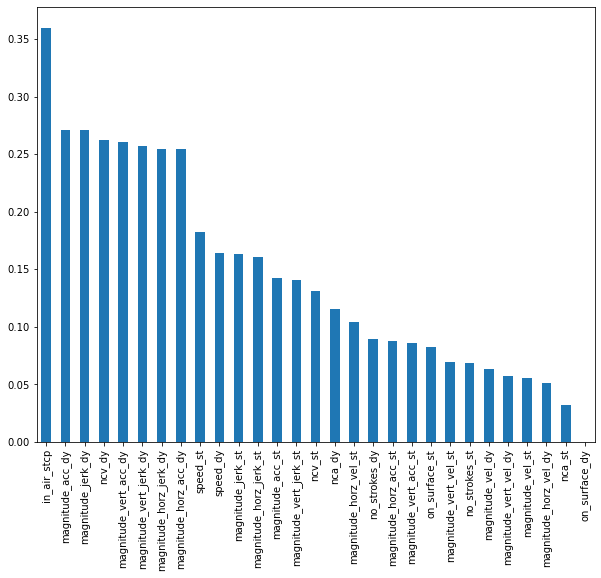

In [14]:
mi_series.sort_values(ascending=False).plot.bar(figsize=(10,8))

In [15]:
# Select K best features
k_best_features = SelectKBest(mutual_info_classif, k=10).fit(X_train.fillna(0), y_train)
print('Selected top 10 features: {}'.format(X_train.columns[k_best_features.get_support()]))

Selected top 10 features: Index(['speed_st', 'speed_dy', 'magnitude_acc_dy', 'magnitude_horz_acc_dy',
       'magnitude_vert_acc_dy', 'magnitude_jerk_dy', 'magnitude_horz_jerk_dy',
       'magnitude_vert_jerk_dy', 'ncv_dy', 'in_air_stcp'],
      dtype='object')


In [16]:
features=data[['speed_st','speed_dy','magnitude_acc_dy','magnitude_horz_acc_dy','magnitude_vert_acc_dy','magnitude_jerk_dy','magnitude_horz_jerk_dy','magnitude_jerk_dy','magnitude_horz_jerk_dy',
               'magnitude_vert_jerk_dy','ncv_dy','in_air_stcp']]
features.head(2)

,speed_st,speed_dy,magnitude_acc_dy,magnitude_horz_acc_dy,magnitude_vert_acc_dy,magnitude_jerk_dy,magnitude_horz_jerk_dy,magnitude_jerk_dy,magnitude_horz_jerk_dy,magnitude_vert_jerk_dy,ncv_dy,in_air_stcp
0,0.000293,0.000431,0.000466,0.000305,0.000282,0.000010,0.000006,0.000010,0.000006,0.000006,412.857143,0.0
1,0.000286,0.000281,0.000728,0.000510,0.000409,0.000015,0.000010,0.000015,0.000010,0.000009,173.875000,0.0


In [18]:
y = data.iloc[:,-1]   


In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(features)

In [20]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRFClassifier,XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier,RandomForestClassifier

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=5)

In [22]:
lr=cross_val_score(LogisticRegression(),x_train,y_train)
xgbc=cross_val_score(XGBRFClassifier(),x_train,y_train)
xgb=cross_val_score(XGBClassifier(),x_train,y_train)
svm=cross_val_score(SVC(),x_train,y_train)

dtc=cross_val_score(DecisionTreeClassifier(),x_train,y_train)
adb=cross_val_score(AdaBoostClassifier(),x_train,y_train)
etc=cross_val_score(ExtraTreesClassifier(),x_train,y_train)
gbc=cross_val_score(GradientBoostingClassifier(),x_train,y_train)
rfc=cross_val_score(RandomForestClassifier(),x_train,y_train)

C:\Users\lenovo\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:12:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:12:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:12:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:12:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\lenovo\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:12:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:12:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [23]:
print('log reg',lr,lr.mean())
print('xgb',xgb,xgb.mean())
print('svm',svm,svm.mean())
#print('nb',nb,nb.mean)
print('dtc',dtc,dtc.mean())
print('adb',adb,adb.mean())
#print('bbc',bbc,bbc.mean())
print('etc',etc,etc.mean())
print('gbc',gbc,gbc.mean())
print('rfc',rfc,rfc.mean())

log reg [0.76923077 0.83333333 0.83333333 0.83333333 0.75      ] 0.803846153846154
xgb [0.92307692 0.83333333 0.91666667 0.91666667 1.        ] 0.9179487179487179
svm [0.76923077 0.83333333 0.83333333 0.83333333 0.75      ] 0.803846153846154
dtc [0.92307692 0.83333333 0.91666667 0.91666667 1.        ] 0.9179487179487179
adb [0.92307692 0.83333333 0.91666667 0.91666667 1.        ] 0.9179487179487179
etc [0.92307692 1.         1.         1.         1.        ] 0.9846153846153847
gbc [0.92307692 0.83333333 0.91666667 0.91666667 1.        ] 0.9179487179487179
rfc [0.92307692 1.         1.         0.91666667 1.        ] 0.9679487179487178


In [24]:
model=XGBClassifier()
model.fit(x_train,y_train)

[23:13:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lenovo\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [25]:
y_predtr=model.predict(x_train)
print(accuracy_score(y_train,y_predtr)*100)

98.36065573770492


In [26]:
y_pred=model.predict(x_test)
print(accuracy_score(y_test, y_pred)*100)

93.75


In [27]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [28]:
y_predtr=model.predict(x_train)
print(accuracy_score(y_train,y_predtr)*100)

100.0


In [29]:
y_pred=model.predict(x_test)
print(accuracy_score(y_test, y_pred)*100)

87.5


In [30]:
model=ExtraTreesClassifier()
model.fit(x_train,y_train)

ExtraTreesClassifier()

In [31]:
y_predtr=model.predict(x_train)
print(accuracy_score(y_train,y_predtr)*100)

100.0


In [32]:
y_pred=model.predict(x_test)
print(accuracy_score(y_test, y_pred)*100)

87.5
